<a href="https://colab.research.google.com/github/bbrauser/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Bradley_Brauser_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

sales_data = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

sales_mean = sum(sales_data) / len(sales_data)
sales_variance = sum((x - sales_mean)**2 for x in sales_data) / (len(sales_data) - 1)
sales_std = math.sqrt(sales_variance)

sales_df = pd.DataFrame({'Sales': sales_data, 
                         'Sales Mean': sales_mean, 
                         'Sales Variance': sales_variance,
                         'Sales Standard Deviaiton': sales_std})
sales_df.head()

,Sales,Sales Mean,Sales Variance,Sales Standard Deviaiton
0,3505,3052.714286,214387.904762,463.020415
1,2400,3052.714286,214387.904762,463.020415
2,3027,3052.714286,214387.904762,463.020415
3,2798,3052.714286,214387.904762,463.020415
4,3700,3052.714286,214387.904762,463.020415


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [2]:
customers = [127, 80, 105, 92, 120, 115, 93]
cust_mean = sum(customers) / len(customers)
cust_variance = sum((x - cust_mean)**2 for x in customers) / (len(customers) - 1)


cust_sales_df = pd.DataFrame({'Sales': sales_data , 'Customer': customers})

cust_sales_df = cust_sales_df.cov()
cust_sales_df.head()

,Sales,Customer
Sales,214387.904762,7604.357143
Customer,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [3]:
cust_std = round(math.sqrt(cust_variance), 2)
sales_std = round(math.sqrt(sales_variance), 2)
print('Customer Standard Deviation:', cust_std)
print('Sales Standard Deviation:', sales_std)

cust_sales_std = {'Sales': sales_data, 
                  'Customers': customers}

df1 = pd.DataFrame(cust_sales_std)

# df1.head()

cscorr = cust_sales_df.iloc[0,1] / (sales_std * cust_std)
print('Correlation Coefficiect of Customes and Sales:', cscorr)

Customer Standard Deviation: 17.06
Sales Standard Deviation: 463.02
Correlation Coefficiect of Customes and Sales: 0.9626839429754722


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [4]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df2 = df2.drop(['Unnamed: 0'], axis=1)
df2 = df2.fillna(0)
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON",1


In [5]:
df2.select_dtypes(include=np.number).columns.tolist()

['pclass',
 'survived',
 'age',
 'sibsp',
 'parch',
 'fare',
 'body',
 'has_cabin_number']

In [6]:
df2 = pd.DataFrame({'pclass': df2['pclass'], 
                         'survived': df2['survived'], 
                         'age': df2['age'],
                         'sibsp': df2['sibsp'],
                         'parch': df2['parch'],
                         'fare': df2['fare'],
                         'body': df2['body'],
                         'has_cabin_number': df2['has_cabin_number']})

df2.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.705453,-0.126482,-3.951584,0.053924,0.013952,-24.150423,-2.164033,-0.249407
survived,-0.126482,0.236181,-0.314103,-0.013932,0.034861,6.156049,-5.673581,0.061424
age,-3.951584,-0.314103,165.850021,-2.557851,-1.458263,113.462982,101.863406,1.463138
sibsp,0.053924,-0.013932,-2.557851,1.084413,0.336722,8.653922,-3.048352,-0.003858
parch,0.013952,0.034861,-1.458263,0.336722,0.748735,9.932434,-1.153653,0.013372
fare,-24.150423,6.156049,113.462982,8.653922,9.932434,2676.557808,-40.679167,10.971645
body,-2.164033,-5.673581,101.863406,-3.048352,-1.153653,-40.679167,3044.601879,0.916147
has_cabin_number,-0.249407,0.061424,1.463138,-0.003858,0.013372,10.971645,0.916147,0.174613


In [7]:
df2.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.309865,-0.365325,0.061652,0.019197,-0.555779,-0.046694,-0.710617
survived,-0.309865,1.000000,-0.050187,-0.027529,0.082901,0.244845,-0.211578,0.302469
age,-0.365325,-0.050187,1.000000,-0.190730,-0.130862,0.170297,0.143349,0.271887
sibsp,0.061652,-0.027529,-0.190730,1.000000,0.373689,0.160630,-0.053052,-0.008865
parch,0.019197,0.082901,-0.130862,0.373689,1.000000,0.221872,-0.024163,0.036982
fare,-0.555779,0.244845,0.170297,0.160630,0.221872,1.000000,-0.014250,0.507510
body,-0.046694,-0.211578,0.143349,-0.053052,-0.024163,-0.014250,1.000000,0.039734
has_cabin_number,-0.710617,0.302469,0.271887,-0.008865,0.036982,0.507510,0.039734,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

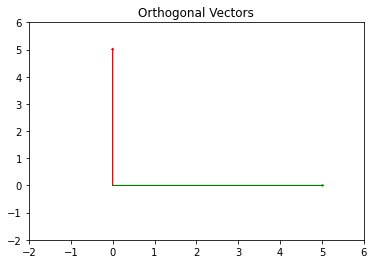

In [8]:
vector1 = [0, 5]
vector2 = [5, 0]

plt.arrow(0,0, vector1[0], vector1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector2[0], vector2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-2,6)          
plt.ylim(-2,6)
plt.title("Orthogonal Vectors")
plt.show()

A synonym for orthogonal is **perpendicular**.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [9]:
a = [-5, 3, 7]
b = [6, -8, 2]

orth = (a[0] * b[0]) + (a[1] * b[1]) + (a[2] * b[2])
if orth == 0:
  print("Vectors ARE orthogonal")
elif orth != 0:
  print("Vecotrs ARE NOT orthogonal")

Vecotrs ARE NOT orthogonal


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [23]:
c = np.array([2, -15, 6, 20])

#What is the norm of c squared?
print('Norm of vector C squared is', np.linalg.norm(c) ** 2)

Norm of vector C squared is 665.0


In [17]:
#What is the dot product of c and itself?
print('Dot product of vector C is', np.vdot(c, c))

Dot product of vector C is 665


In [26]:
#What is c transpose multiplied by c?
print('C Transpose multiplied by C is', np.transpose(c) * c)

C Transpose multiplied by C is [  4 225  36 400]
The norm of C Transpose multiplied by C is 460.36615861724675


All three quantities are equal to 665.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7 * \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 * \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
\end{align}
<br>
\begin{align}
d = \begin{bmatrix} 7 \\ 0  \end{bmatrix} + \begin{bmatrix} 0 \\ 12 \end{bmatrix}
\qquad
\end{align}
<br>
\begin{align}
d = \begin{bmatrix} 7 \\ 12  \end{bmatrix}
\qquad
\end{align}
<br>
\begin{align}
e = 2 * \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11 * \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8 * \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\qquad
\end{align}
<br>
\begin{align}
e = \begin{bmatrix} 2 \\ 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0 \\ 11 \\ 0 \end{bmatrix} + \begin{bmatrix} 0 \\ 0 \\ -8 \end{bmatrix}
\qquad
\end{align}
<br>
\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} + 12 * \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [28]:
f = np.array([4, 12, 11, 9, 2])
f_norm = np.linalg.norm(f)

print('Unit Vector of F is', f / f_norm)

Unit Vector of F is [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

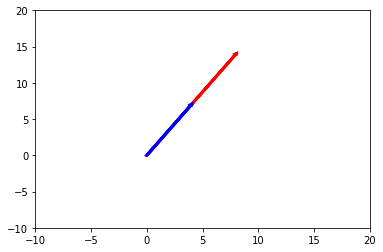

In [46]:
plt.xlim(-10,20)          
plt.ylim(-10,20)

a = np.array([4,7]) 
b = np.array([8, 14])

plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')

plt.show()

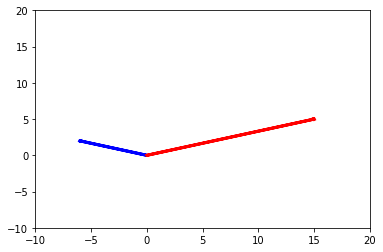

In [45]:
plt.xlim(-10,20)          
plt.ylim(-10,20)

a = [-6, 2] 
b = [15, 5]

plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

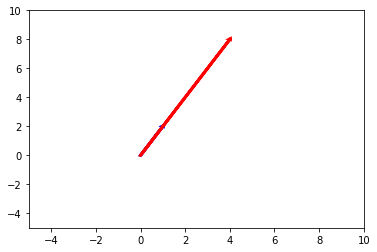

In [48]:
plt.xlim(-5,10)          
plt.ylim(-5,10)

a = [1, 2] 
b = [4, 8]

plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

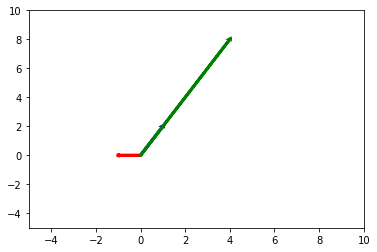

In [52]:
plt.xlim(-5,10)          
plt.ylim(-5,10)

l = [1, 2, 3] 
m = [-1, 0, 7]
n = [4, 8, 2]

plt.arrow(0,0, l[0], l[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, m[0], m[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, n[0], n[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')

plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


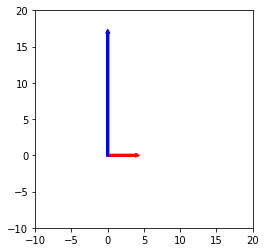

In [54]:
plt.xlim(-10,20)          
plt.ylim(-10,20)

i_hat = [4,0]
j_hat = [0,17]

plt.axes().set_aspect('equal')

plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_hat[0], j_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')

plt.show()

## 6.2 What does it mean to form a basis?

To form a basis is to have vectors that are lineraly independent and span that space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [55]:
P = np.array([[1, 3, 3],
              [-1, 0, 7],
              [4, 8, 2]])

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the dimension of the vector space spanned by its columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()